In [1]:
!pip install yfinance

     ---------------------------------------- 62.5/62.5 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00


In [63]:
# For data manipulation
import pandas as pd

# To fetch financial data
import yfinance as yf

# For visualisation
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

C:\Users\user\AppData\Local\Temp\ipykernel_7364\3231778145.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [3]:
# Download the platinum prices
futures_data = yf.download(["GC=F","HG=F"], start="2020-01-01", end="2023-05-31")

# Set the index to a datetime type
futures_data.index = pd.to_datetime(futures_data.index)

# Display the last five rows
futures_data.tail()

[*********************100%***********************]  2 of 2 completed


Adj Close                Close                 High          \
                   GC=F    HG=F         GC=F    HG=F         GC=F    HG=F   
Date                                                                        
2023-05-23  1972.400024  3.6415  1972.400024  3.6415  1972.400024  3.6700   
2023-05-24  1962.800049  3.5535  1962.800049  3.5535  1975.400024  3.6040   
2023-05-25  1943.099976  3.5805  1943.099976  3.5805  1943.099976  3.6090   
2023-05-26  1944.099976  3.6735  1944.099976  3.6735  1948.400024  3.6735   
2023-05-30  1958.000000  3.6580  1958.000000  3.6580  1962.599976  3.6800   

                    Low                 Open            Volume        
                   GC=F    HG=F         GC=F    HG=F      GC=F  HG=F  
Date                                                                  
2023-05-23  1972.400024  3.6130  1972.400024  3.6700       1.0   367  
2023-05-24  1962.800049  3.5400  1975.400024  3.6000     189.0   553  
2023-05-25  1943.099976  3.5685  1943.099976  3.5845       1.0   546  
2023-05-26  1944.099976  3.6050  1948.199951  3.6050  166036.0   660  
2023-05-30  1931.000000  3.6325  1942.699951  3.6670   37838.0  1442

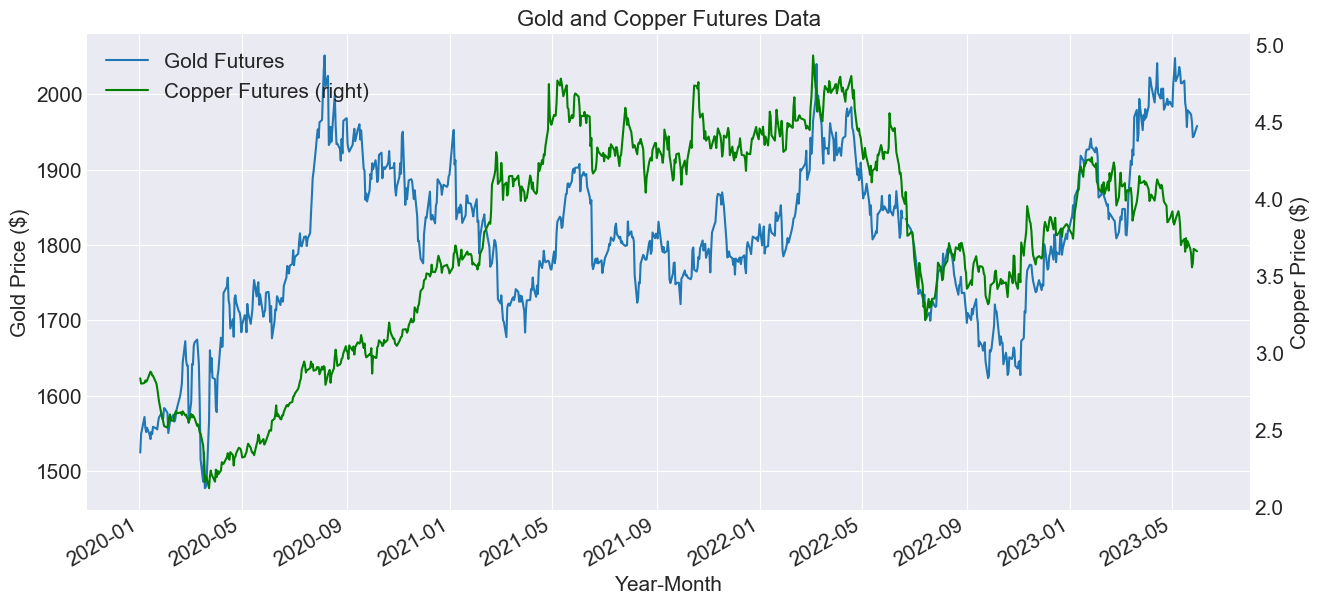

In [4]:
# Set the figure size
ax = plt.figure(figsize=(15, 7))

# Plot both futures close prices
ax = futures_data['Close']['GC=F'].plot(label='Gold Futures')
ax2 = futures_data['Close']['HG=F'].plot(secondary_y=True, color='g',  ax=ax, label='Copper Futures')

# Set the title and axis labels and sizes
plt.title('Gold and Copper Futures Data', fontsize=16)
ax.set_xlabel('Year-Month', fontsize=15)
ax.set_ylabel('Gold Price ($)', fontsize=15)
ax2.set_ylabel('Copper Price ($)', fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=2, prop={'size': 15})

# Show the plot
plt.show()

In [4]:
# Download HSI from 2000-01-01
hsi_data = yf.download(["^HSI", ""], start="2000-01-01", end="2023-05-31")

# Set the index to a datetime type
hsi_data.index = pd.to_datetime(hsi_data.index)

# Display the first five rows
hsi_data.head()

[*********************100%***********************]  2 of 2 completed

1 Failed download:
- : No timezone found, symbol may be delisted


Adj Close               Close               High               Low  \
                              ^HSI                ^HSI               ^HSI       
Date                                                                            
2000-01-03       NaN  17369.630859   NaN  17369.630859  NaN  17426.160156 NaN   
2000-01-04       NaN  17072.820312   NaN  17072.820312  NaN  17303.000000 NaN   
2000-01-05       NaN  15846.719727   NaN  15846.719727  NaN  16608.550781 NaN   
2000-01-06       NaN  15153.230469   NaN  15153.230469  NaN  15971.030273 NaN   
2000-01-07       NaN  15405.629883   NaN  15405.629883  NaN  15513.889648 NaN   

                         Open               Volume       
                    ^HSI               ^HSI        ^HSI  
Date                                                     
2000-01-03  17057.699219  NaN  17057.699219    NaN    0  
2000-01-04  16933.519531  NaN  17303.000000    NaN    0  
2000-01-05  15688.490234  NaN  16608.550781    NaN    0  
2000-01-06  14763.969727  NaN  15942.070312    NaN    0  
2000-01-07  15108.750000  NaN  15329.339844    NaN    0

In [21]:
hsi_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-23,19713.460938,19769.140625,19363.500000,19431.250000,19431.250000,1888538600
2023-05-24,19279.390625,19304.199219,19046.800781,19115.929688,19115.929688,2476667200
2023-05-25,18930.230469,18930.230469,18620.839844,18746.919922,18746.919922,2792438700
2023-05-29,18827.080078,18879.089844,18517.859375,18551.109375,18551.109375,2196594700
2023-05-30,18574.189453,18666.710938,18369.929688,18595.779297,18595.779297,2244980000


In [5]:
ipo_list = pd.read_excel("HKEX_listed_date_20230606.xlsx", sheet_name = "after2000")

In [6]:
ipo_list

,Row,Stock\nCode,yahoo_code,Sec.\ntype,Issuer,First trade\non this\nboard,First_trade,Total\nreturn\n%,CAGR\ntotal\nreturn\n%,CAGR\nrelative\nreturn\n%
0,1,8495,8495.HK,O,1957 & Co. (Hospitality) Limited,2017-12-05,2017-12-05,-48.18,-11.27,-7.45
1,2,3601,3601.HK,O,360 LUDASHI HOLDINGS LIMITED,2019-10-10,2019-10-10,-84.54,-40.02,-36.90
2,3,1361,1361.HK,O,361 Degrees International Limited,2009-06-30,2009-06-30,62.40,3.54,0.08
3,4,1244,1244.HK,O,3D Medicines Inc.,2022-12-15,2022-12-15,160.73,NaN,NaN
4,5,1530,1530.HK,O,3SBio Inc.,2015-06-11,2015-06-11,-13.10,-1.74,-0.78
...,...,...,...,...,...,...,...,...,...,...
2045,2603,1157,1157.HK,H,Zoomlion Heavy Industry Science and Technology...,2010-12-23,2010-12-23,-46.58,-4.91,-6.62
2046,2604,763,0763.HK,H,ZTE CORPORATION,2004-12-09,2004-12-09,369.03,8.72,3.51
2047,2605,2057,2057.HK,A,ZTO Express (Cayman) Inc.,2023-05-02,2020-09-29,-4.77,NaN,NaN
2048,2606,6866,6866.HK,H,Zuoli Kechuang Micro-finance Company Limited,2015-01-13,2015-01-13,-66.52,-12.23,-12.63


In [39]:
stock_list = ipo_list["yahoo_code"].to_list()
type(stock_list)

list

In [40]:
stock_list.insert(0, "^HSI")

In [41]:
stock_data = yf.download(stock_list, start="2000-01-01", end="2023-05-31")

[*********************100%***********************]  2051 of 2051 completed

ERROR 
6 Failed downloads:
ERROR ['4621.HK']: Exception('4621.HK: No price data found, symbol may be delisted (1d 2000-01-01 -> 2023-05-31)')
ERROR ['4619.HK']: Exception('4619.HK: No price data found, symbol may be delisted (1d 2000-01-01 -> 2023-05-31)')
ERROR ['4620.HK']: Exception('4620.HK: No price data found, symbol may be delisted (1d 2000-01-01 -> 2023-05-31)')
ERROR ['4617.HK']: Exception('4617.HK: No price data found, symbol may be delisted (1d 2000-01-01 -> 2023-05-31)')
ERROR ['7841.HK']: Exception("7841.HK: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR ['4618.HK']: Exception('4618.HK: No price data found, symbol may be delisted (1d 2000-01-01 -> 2023-05-31)')


In [111]:
# Set the index to a datetime type
stock_data.index = pd.to_datetime(stock_data.index)
stock_data

Adj Close                                                    \
             0007.HK   0008.HK 0009.HK 0013.HK 0020.HK 0033.HK 0039.HK   
Date                                                                     
2000-01-04       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-05       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-06       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-07       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-10       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
...              ...       ...     ...     ...     ...     ...     ...   
2023-05-23     0.241  3.778027   0.016   20.90    2.19    6.12   0.156   
2023-05-24     0.238  3.768744   0.015   20.60    2.08    6.10   0.160   
2023-05-25     0.239  3.703765   0.015   20.15    2.10    7.29   0.160   
2023-05-29     0.235  3.713048   0.015   19.90    2.15    7.69   0.156   
2023-05-30     0.235  3.731613   0.014   19.90    2.19    8.18   0.160   

                                      ...    Volume                       \
           0048.HK 0064.HK   0065.HK  ...   9989.HK    9990.HK   9991.HK   
Date                                  ...                                  
2000-01-04     NaN     NaN  6.082530  ...       NaN        NaN       NaN   
2000-01-05     NaN     NaN  5.762396  ...       NaN        NaN       NaN   
2000-01-06     NaN     NaN  5.548974  ...       NaN        NaN       NaN   
2000-01-07     NaN     NaN  5.797966  ...       NaN        NaN       NaN   
2000-01-10     NaN     NaN  5.869107  ...       NaN        NaN       NaN   
...            ...     ...       ...  ...       ...        ...       ...   
2023-05-23   0.285   0.148  0.305000  ...  225000.0  1653000.0   13500.0   
2023-05-24   0.285   0.148  0.305000  ...  435500.0  2423000.0   14100.0   
2023-05-25   0.285   0.147  0.310000  ...  298500.0  3677000.0    2700.0   
2023-05-29   0.285   0.147  0.350000  ...  399000.0  2898000.0  126800.0   
2023-05-30   0.285   0.147  0.345000  ...  380500.0  4143603.0   27800.0   

                                                                          \
              9992.HK    9993.HK    9995.HK    9996.HK   9997.HK 9998.HK   
Date                                                                       
2000-01-04        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-05        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-06        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-07        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-10        NaN        NaN        NaN        NaN       NaN     NaN   
...               ...        ...        ...        ...       ...     ...   
2023-05-23  3607600.0  1126000.0  1773600.0  2758000.0  435500.0     0.0   
2023-05-24  2813400.0  1360000.0  1503000.0  6441000.0  504500.0     0.0   
2023-05-25  4246200.0  1081000.0  2439200.0  1532610.0  701500.0     0.0   
2023-05-29  5075800.0  1144000.0  3120000.0  1375128.0  417000.0     0.0   
2023-05-30  4394410.0  1173000.0  2236000.0  1574000.0  411042.0     0.0   

                       
              9999.HK  
Date                   
2000-01-04        NaN  
2000-01-05        NaN  
2000-01-06        NaN  
2000-01-07        NaN  
2000-01-10        NaN  
...               ...  
2023-05-23  5323804.0  
2023-05-24  3491134.0  
2023-05-25  4698017.0  
2023-05-29  6730915.0  
2023-05-30  5031948.0  

[5972 rows x 12300 columns]

In [25]:
stock_data["Adj Close"].to_excel("HKEX_listed_prices.xlsx", sheet_name = "adj_close")

In [2]:
stock_data.to_pickle("HKEX_listed_prices.pkl")

NameError: name 'stock_data' is not defined

In [3]:
stock_data = pd.read_pickle("HKEX_listed_prices.pkl")
stock_data.index = pd.to_datetime(stock_data.index)
stock_data

Adj Close                                                    \
             0007.HK   0008.HK 0009.HK 0013.HK 0020.HK 0033.HK 0039.HK   
Date                                                                     
2000-01-04       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-05       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-06       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-07       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
2000-01-10       NaN       NaN     NaN     NaN     NaN     NaN     NaN   
...              ...       ...     ...     ...     ...     ...     ...   
2023-05-23     0.241  3.778027   0.016   20.90    2.19    6.12   0.156   
2023-05-24     0.238  3.768744   0.015   20.60    2.08    6.10   0.160   
2023-05-25     0.239  3.703765   0.015   20.15    2.10    7.29   0.160   
2023-05-29     0.235  3.713048   0.015   19.90    2.15    7.69   0.156   
2023-05-30     0.235  3.731613   0.014   19.90    2.19    8.18   0.160   

                                      ...    Volume                       \
           0048.HK 0064.HK   0065.HK  ...   9989.HK    9990.HK   9991.HK   
Date                                  ...                                  
2000-01-04     NaN     NaN  6.082530  ...       NaN        NaN       NaN   
2000-01-05     NaN     NaN  5.762396  ...       NaN        NaN       NaN   
2000-01-06     NaN     NaN  5.548974  ...       NaN        NaN       NaN   
2000-01-07     NaN     NaN  5.797966  ...       NaN        NaN       NaN   
2000-01-10     NaN     NaN  5.869107  ...       NaN        NaN       NaN   
...            ...     ...       ...  ...       ...        ...       ...   
2023-05-23   0.285   0.148  0.305000  ...  225000.0  1653000.0   13500.0   
2023-05-24   0.285   0.148  0.305000  ...  435500.0  2423000.0   14100.0   
2023-05-25   0.285   0.147  0.310000  ...  298500.0  3677000.0    2700.0   
2023-05-29   0.285   0.147  0.350000  ...  399000.0  2898000.0  126800.0   
2023-05-30   0.285   0.147  0.345000  ...  380500.0  4143603.0   27800.0   

                                                                          \
              9992.HK    9993.HK    9995.HK    9996.HK   9997.HK 9998.HK   
Date                                                                       
2000-01-04        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-05        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-06        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-07        NaN        NaN        NaN        NaN       NaN     NaN   
2000-01-10        NaN        NaN        NaN        NaN       NaN     NaN   
...               ...        ...        ...        ...       ...     ...   
2023-05-23  3607600.0  1126000.0  1773600.0  2758000.0  435500.0     0.0   
2023-05-24  2813400.0  1360000.0  1503000.0  6441000.0  504500.0     0.0   
2023-05-25  4246200.0  1081000.0  2439200.0  1532610.0  701500.0     0.0   
2023-05-29  5075800.0  1144000.0  3120000.0  1375128.0  417000.0     0.0   
2023-05-30  4394410.0  1173000.0  2236000.0  1574000.0  411042.0     0.0   

                       
              9999.HK  
Date                   
2000-01-04        NaN  
2000-01-05        NaN  
2000-01-06        NaN  
2000-01-07        NaN  
2000-01-10        NaN  
...               ...  
2023-05-23  5323804.0  
2023-05-24  3491134.0  
2023-05-25  4698017.0  
2023-05-29  6730915.0  
2023-05-30  5031948.0  

[5972 rows x 12300 columns]

In [17]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5972 entries, 2000-01-04 00:00:00 to 2023-05-30 00:00:00
Columns: 12300 entries, ('Adj Close', '0007.HK') to ('Volume', '9999.HK')
dtypes: float64(12300)
memory usage: 560.5+ MB


In [20]:
hsi_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5769 entries, 2000-01-03 to 2023-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5769 non-null   float64
 1   High       5769 non-null   float64
 2   Low        5769 non-null   float64
 3   Close      5769 non-null   float64
 4   Adj Close  5769 non-null   float64
 5   Volume     5769 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 315.5 KB


In [31]:
hsi_data["Adj Close"]

Date
2000-01-03    17369.630859
2000-01-04    17072.820312
2000-01-05    15846.719727
2000-01-06    15153.230469
2000-01-07    15405.629883
                  ...     
2023-05-23    19431.250000
2023-05-24    19115.929688
2023-05-25    18746.919922
2023-05-29    18551.109375
2023-05-30    18595.779297
Name: Adj Close, Length: 5769, dtype: float64

In [5]:
adj_close_data = stock_data["Adj Close"]
adj_close_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5972 entries, 2000-01-04 00:00:00 to 2023-05-30 00:00:00
Columns: 2050 entries, 0007.HK to 9999.HK
dtypes: float64(2050)
memory usage: 93.4+ MB


In [6]:
adj_close_data

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0065.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.082530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.762396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.548974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.797966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.869107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,0.241,3.778027,0.016,20.90,2.19,6.12,0.156,0.285,0.148,0.305000,...,4.52785,4.09,11.32,17.799999,3.67,38.200001,7.86,8.782662,0.151,135.000000
2023-05-24,0.238,3.768744,0.015,20.60,2.08,6.10,0.160,0.285,0.148,0.305000,...,4.48000,4.01,11.06,17.480000,3.76,35.950001,7.46,8.724047,0.151,131.699997
2023-05-25,0.239,3.703765,0.015,20.15,2.10,7.29,0.160,0.285,0.147,0.310000,...,4.46000,3.93,10.94,16.780001,3.51,34.750000,7.39,8.733816,0.151,130.500000


In [22]:
adj_close_data[:1].columns[adj_close_data[:1].notna().all()]

Index(['0065.HK', '0096.HK', '0737.HK', '0775.HK', '0896.HK', '1073.HK',
       '1079.HK', '1083.HK', '1110.HK', '1371.HK', '1972.HK', '2238.HK',
       '2340.HK', '3311.HK', '8032.HK', '8137.HK'],
      dtype='object')

In [142]:
adj_close_data_filtered = adj_close_data.drop(adj_close_data[:1].columns[adj_close_data[:1].notna().all()], axis = 1)
adj_close_data_filtered

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,0.241,3.778027,0.016,20.90,2.19,6.12,0.156,0.285,0.148,37.601833,...,4.52785,4.09,11.32,17.799999,3.67,38.200001,7.86,8.782662,0.151,135.000000
2023-05-24,0.238,3.768744,0.015,20.60,2.08,6.10,0.160,0.285,0.148,37.504169,...,4.48000,4.01,11.06,17.480000,3.76,35.950001,7.46,8.724047,0.151,131.699997
2023-05-25,0.239,3.703765,0.015,20.15,2.10,7.29,0.160,0.285,0.147,37.260002,...,4.46000,3.93,10.94,16.780001,3.51,34.750000,7.39,8.733816,0.151,130.500000


In [54]:
adj_close_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5972 entries, 2000-01-04 00:00:00 to 2023-05-30 00:00:00
Columns: 2034 entries, 0007.HK to 9999.HK
dtypes: float64(2034)
memory usage: 92.8+ MB


In [56]:
len(adj_close_data_filtered.index)

5972

In [53]:
adj_close_data_filtered.columns[adj_close_data_filtered.isna().sum() == 5972]

Index(['4617.HK', '4618.HK', '4619.HK', '4620.HK', '4621.HK', '7841.HK'], dtype='object')

In [143]:
adj_close_data_filtered = adj_close_data_filtered.drop(adj_close_data_filtered.columns[adj_close_data_filtered.isna().sum() == len(adj_close_data_filtered.index)], axis = 1)

In [144]:
adj_close_data_filtered

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,0.241,3.778027,0.016,20.90,2.19,6.12,0.156,0.285,0.148,37.601833,...,4.52785,4.09,11.32,17.799999,3.67,38.200001,7.86,8.782662,0.151,135.000000
2023-05-24,0.238,3.768744,0.015,20.60,2.08,6.10,0.160,0.285,0.148,37.504169,...,4.48000,4.01,11.06,17.480000,3.76,35.950001,7.46,8.724047,0.151,131.699997
2023-05-25,0.239,3.703765,0.015,20.15,2.10,7.29,0.160,0.285,0.147,37.260002,...,4.46000,3.93,10.94,16.780001,3.51,34.750000,7.39,8.733816,0.151,130.500000


In [42]:
adj_close_data_filtered.apply(pd.Series.first_valid_index)

0007.HK   2000-09-11
0008.HK   2003-01-08
0009.HK   2001-09-12
0013.HK   2021-06-30
0020.HK   2021-12-30
             ...    
9995.HK   2020-11-09
9996.HK   2020-05-15
9997.HK   2020-06-29
9998.HK   2020-01-08
9999.HK   2020-06-11
Length: 2034, dtype: datetime64[ns]

In [68]:
adj_close_data_filtered.iloc[:,1] / adj_close_data_filtered.iloc[:,1][pd.Series.first_valid_index(adj_close_data_filtered.iloc[:,1])]

Date
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
                ...   
2023-05-23    2.724760
2023-05-24    2.718065
2023-05-25    2.671202
2023-05-29    2.677897
2023-05-30    2.691286
Name: 0008.HK, Length: 5972, dtype: float64

In [75]:
len(adj_close_data_filtered.columns)

2028

In [92]:
for i in range(0, len(adj_close_data_filtered.columns)-1):
    adj_close_data_filtered.iloc[:,i] = adj_close_data_filtered.iloc[:,i] / adj_close_data_filtered.iloc[:,i][pd.Series.first_valid_index(adj_close_data_filtered.iloc[:,i])]

In [150]:
def divide_by_first_values(data_series):
    return data_series / data_series[pd.Series.first_valid_index(data_series)]

In [151]:
adj_close_data_filtered_first = adj_close_data_filtered.apply(divide_by_first_values)
adj_close_data_filtered_first

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,0.078758,2.724760,0.002285,0.346600,0.530266,0.050179,0.311907,0.011794,0.502356,6.259974,...,0.268648,0.202566,0.134762,0.261497,0.941466,0.547278,0.304651,0.335792,0.251667,1.042990
2023-05-24,0.077778,2.718065,0.002142,0.341625,0.503632,0.050015,0.319904,0.011794,0.502356,6.243715,...,0.265809,0.198603,0.131667,0.256795,0.964553,0.515043,0.289147,0.333551,0.251667,1.017494
2023-05-25,0.078105,2.671202,0.002142,0.334163,0.508475,0.059772,0.319904,0.011794,0.498961,6.203066,...,0.264622,0.194641,0.130238,0.246512,0.900421,0.497851,0.286434,0.333924,0.251667,1.008223


In [40]:
divide_by_first_values(adj_close_data_filtered["0007.HK"])

Date
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
                ...   
2023-05-23    0.078758
2023-05-24    0.077778
2023-05-25    0.078105
2023-05-29    0.076797
2023-05-30    0.076797
Name: 0007.HK, Length: 5972, dtype: float64

In [ ]:
for (column, data) in adj_close_data_filtered.items():
    adj_close_data_filtered[column] = data / data[pd.Series.first_valid_index(data)]

In [82]:
adj_close_data_filtered

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,0.241,2.724760,0.002285,0.346600,0.530266,0.050179,0.311907,0.011794,0.502356,6.259974,...,0.268648,0.202566,0.134762,0.261497,0.941466,0.547278,0.304651,0.335792,0.251667,1.042990
2023-05-24,0.238,2.718065,0.002142,0.341625,0.503632,0.050015,0.319904,0.011794,0.502356,6.243715,...,0.265809,0.198603,0.131667,0.256795,0.964553,0.515043,0.289147,0.333551,0.251667,1.017494
2023-05-25,0.239,2.671202,0.002142,0.334163,0.508475,0.059772,0.319904,0.011794,0.498961,6.203066,...,0.264622,0.194641,0.130238,0.246512,0.900421,0.497851,0.286434,0.333924,0.251667,1.008223


In [121]:
adj_close_data_filtered.index = pd.to_datetime(adj_close_data_filtered.index)
adj_close_data_filtered_weekly = adj_close_data_filtered.resample('W', label='left').last()

C:\Users\user\AppData\Local\Temp\ipykernel_7364\3451944627.py:2: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  adj_close_data_filtered_weekly = adj_close_data_filtered.resample('W', label='left', loffset=pd.DateOffset(days=1)).last()


In [123]:
from pandas.tseries.frequencies import to_offset
adj_close_data_filtered_Weekly.index = adj_close_data_filtered_Weekly.index + to_offset("5D")
adj_close_data_filtered_weekly

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,0.072549,2.764928,0.002571,0.417081,0.627119,0.048375,0.309907,0.012414,0.502356,6.487611,...,0.276174,0.239711,0.142381,0.289590,0.997902,0.606017,0.355814,0.366047,0.300000,139.600006
2023-05-08,0.077778,2.744844,0.002142,0.358209,0.552058,0.048867,0.291913,0.012001,0.498961,6.292494,...,0.270385,0.209995,0.139048,0.277317,0.972249,0.565186,0.308915,0.343636,0.298333,135.699997
2023-05-15,0.078431,2.744844,0.001999,0.335821,0.535109,0.049195,0.301910,0.011794,0.498961,6.268105,...,0.266332,0.203061,0.142619,0.266785,0.941466,0.532235,0.299612,0.349238,0.251667,138.399994


In [131]:
adj_close_data_filtered_monthly = adj_close_data_filtered.resample('M', label='left').last()
adj_close_data_filtered_monthly

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,0.062745,2.577476,0.003856,0.477612,0.687651,0.012791,0.267920,0.015725,0.526116,6.812804,...,0.335231,0.209499,0.224286,0.370389,1.051773,0.902579,0.484496,0.346624,0.281667,139.644196
2023-01-31,0.060131,2.610949,0.004284,0.428690,0.610169,0.015988,0.347896,0.016139,0.512538,6.430701,...,0.313808,0.299143,0.196190,0.318520,1.228779,0.736390,0.441085,0.358576,0.273333,121.051628
2023-02-28,0.077778,2.624339,0.003427,0.342454,0.644068,0.019760,0.419874,0.014897,0.505750,6.154287,...,0.316124,0.282799,0.171905,0.312676,1.141559,0.599570,0.381008,0.358203,0.245000,138.000000


In [133]:
adj_close_data_filtered_qly = adj_close_data_filtered.resample('Q', label='left').last()
adj_close_data_filtered_qly

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,0.856209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,1.300654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.104839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,1.683007,NaN,NaN,NaN,NaN,NaN,0.990566,NaN,NaN,1.016129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,0.086275,2.713535,0.005141,0.320730,0.757869,0.015906,0.199940,0.021932,0.489958,6.598176,...,0.418025,0.278837,0.344643,0.553758,1.180039,0.629656,0.300775,0.290970,0.333333,143.853470
2022-06-30,0.066013,2.376633,0.003570,0.219237,0.387409,0.015086,0.199940,0.022760,0.512753,5.861613,...,0.299913,0.139666,0.180238,0.210983,0.872202,0.545129,0.239535,0.208422,0.275000,118.358383
2022-09-30,0.058824,2.356549,0.003570,0.398010,0.537530,0.013775,0.289913,0.018208,0.512538,6.723375,...,0.316124,0.189689,0.156429,0.289590,0.972249,0.829513,0.370543,0.302549,0.266667,114.454269


In [135]:
adj_close_data_filtered_yly = adj_close_data_filtered.resample('A', convention = 'end').last()
adj_close_data_filtered_yly

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-31,1.300654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.104839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,0.653595,NaN,2.640000,NaN,NaN,NaN,0.965336,NaN,NaN,0.839116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-12-31,0.097386,NaN,2.400000,NaN,NaN,NaN,0.675735,NaN,0.804733,0.695942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-31,0.189542,0.765151,1.960000,NaN,NaN,NaN,0.868802,NaN,0.734319,0.905033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31,0.196078,0.754978,1.800000,NaN,NaN,NaN,0.799760,NaN,1.577278,1.138555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-31,0.431373,0.757905,1.840000,NaN,NaN,NaN,0.599820,NaN,0.720768,1.444125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,2.209150,0.780579,2.200000,NaN,NaN,NaN,0.359892,NaN,0.728070,1.887412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,1.274510,0.794196,1.120000,NaN,NaN,0.883871,0.759772,NaN,0.937743,2.832647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-31,0.277778,0.666312,0.250000,NaN,NaN,0.665766,0.219934,NaN,0.299859,1.792947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
adj_close_data_filtered.index = pd.to_datetime(adj_close_data_filtered.index)
adj_close_data_filtered_qly = adj_close_data_filtered.resample('Q', convention = 'end').last()
adj_close_data_filtered_qly

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,2.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,3.980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.636443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-31,5.150,NaN,NaN,NaN,NaN,NaN,0.495431,NaN,NaN,6.103590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,0.264,3.762463,0.036,19.34,3.13,1.94,0.100000,0.530,0.144348,39.633312,...,7.045490,5.63,28.950001,37.694141,4.60,43.950001,7.76,7.610339,0.200,143.853470
2022-09-30,0.202,3.295330,0.025,13.22,1.60,1.84,0.100000,0.550,0.151063,35.208992,...,5.054798,2.82,15.140000,14.361567,3.40,38.049999,6.18,5.451308,0.165,118.358383
2022-12-31,0.180,3.267482,0.025,24.00,2.22,1.68,0.145000,0.440,0.151000,40.385345,...,5.328030,3.83,13.140000,19.712345,3.79,57.900002,9.56,7.913189,0.160,114.454269


In [147]:
adj_close_data_filtered_qly_normal = adj_close_data_filtered_qly.apply(normalize_by_first_values)
adj_close_data_filtered_qly_normal

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,0.830910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-31,1.545736,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,-0.042141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,-1.439429,2.801467,-1.337227,-2.166000,-1.343472,-1.802325,-1.792979,-3.647881,-1.977805,2.609603,...,-2.161872,-2.561492,-1.504008,-1.841627,1.683074,-1.696097,-2.448838,-3.354773,-2.611103,0.667192
2022-09-30,-1.477308,2.339507,-1.338928,-2.489631,-2.210776,-1.804028,-1.792979,-3.644769,-1.856868,2.259699,...,-2.829168,-2.971743,-1.903055,-2.838570,-1.614835,-1.892891,-2.590359,-3.705874,-2.790296,-0.902949
2022-12-31,-1.490749,2.311968,-1.338928,-1.919575,-1.859320,-1.806752,-1.588938,-3.661888,-1.858008,2.669078,...,-2.737578,-2.824286,-1.960846,-2.609945,-0.543015,-1.230796,-2.287613,-3.305524,-2.815895,-1.143388


In [146]:
def normalize_by_first_values(data_series):
    return (data_series - data_series[pd.Series.first_valid_index(data_series)]) / data_series.std()

In [154]:
hsi_data_qly = hsi_data["Adj Close"]["^HSI"].resample('Q', convention = 'end').last()
hsi_data_qly

Date
2000-03-31    17406.539062
2000-06-30    16155.780273
2000-09-30    15648.980469
2000-12-31    15095.530273
2001-03-31    12760.639648
                  ...     
2022-06-30    21859.789062
2022-09-30    17222.830078
2022-12-31    19781.410156
2023-03-31    20400.109375
2023-06-30    18595.779297
Freq: Q-DEC, Name: ^HSI, Length: 94, dtype: float64

In [156]:
hsi_data_qly_normal = normalize_by_first_values(hsi_data_qly)
hsi_data_qly_normal

Date
2000-03-31    0.000000
2000-06-30   -0.223636
2000-09-30   -0.314251
2000-12-31   -0.413208
2001-03-31   -0.830687
                ...   
2022-06-30    0.796241
2022-09-30   -0.032847
2022-12-31    0.424627
2023-03-31    0.535250
2023-06-30    0.212636
Freq: Q-DEC, Name: ^HSI, Length: 94, dtype: float64

In [139]:
adj_close_data_filtered_yly_normal = adj_close_data_filtered_yly.apply(normalize_by_first_values)
adj_close_data_filtered_yly_normal

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0066.HK,...,9989.HK,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-31,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,-1.221718,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,-0.121876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-12-31,-2.271902,NaN,-0.259668,NaN,NaN,NaN,-0.815823,NaN,0.000000,-0.187545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-31,-2.097900,0.000000,-0.735727,NaN,NaN,NaN,-0.271941,NaN,-0.290811,-0.091643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31,-2.085559,-0.013350,-0.908839,NaN,NaN,NaN,-0.466436,NaN,3.190624,0.015464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-31,-1.641298,-0.009509,-0.865561,NaN,NaN,NaN,-1.029679,NaN,-0.346774,0.155617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,1.715342,0.020244,-0.476059,NaN,NaN,NaN,-1.705571,NaN,-0.316619,0.358935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,-0.049362,0.038113,-1.644566,NaN,NaN,0.000000,-0.579084,NaN,0.549334,0.792477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-31,-1.931302,-0.129699,-2.585863,NaN,NaN,-0.532020,-2.099841,NaN,-2.085136,0.315608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
adj_close_data.drop(pd.to_datetime("2000-01-03"))

,0007.HK,0008.HK,0009.HK,0013.HK,0020.HK,0033.HK,0039.HK,0048.HK,0064.HK,0065.HK,...,9990.HK,9991.HK,9992.HK,9993.HK,9995.HK,9996.HK,9997.HK,9998.HK,9999.HK,^HSI
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.082530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17072.820312
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.762396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15846.719727
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.548973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15153.230469
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.797966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15405.629883
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.869107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15848.150391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,0.241,4.07,0.016,20.90,2.19,6.12,0.156,0.285,0.148,0.305000,...,4.09,11.32,17.799999,3.67,38.200001,7.86,8.782662,0.151,135.000000,19431.250000
2023-05-24,0.238,4.06,0.015,20.60,2.08,6.10,0.160,0.285,0.148,0.305000,...,4.01,11.06,17.480000,3.76,35.950001,7.46,8.724047,0.151,131.699997,19115.929688
2023-05-25,0.239,3.99,0.015,20.15,2.10,7.29,0.160,0.285,0.147,0.310000,...,3.93,10.94,16.780001,3.51,34.750000,7.39,8.733816,0.151,130.500000,18746.919922


In [12]:
adj_close_data["0096.HK"].name

'0096.HK'

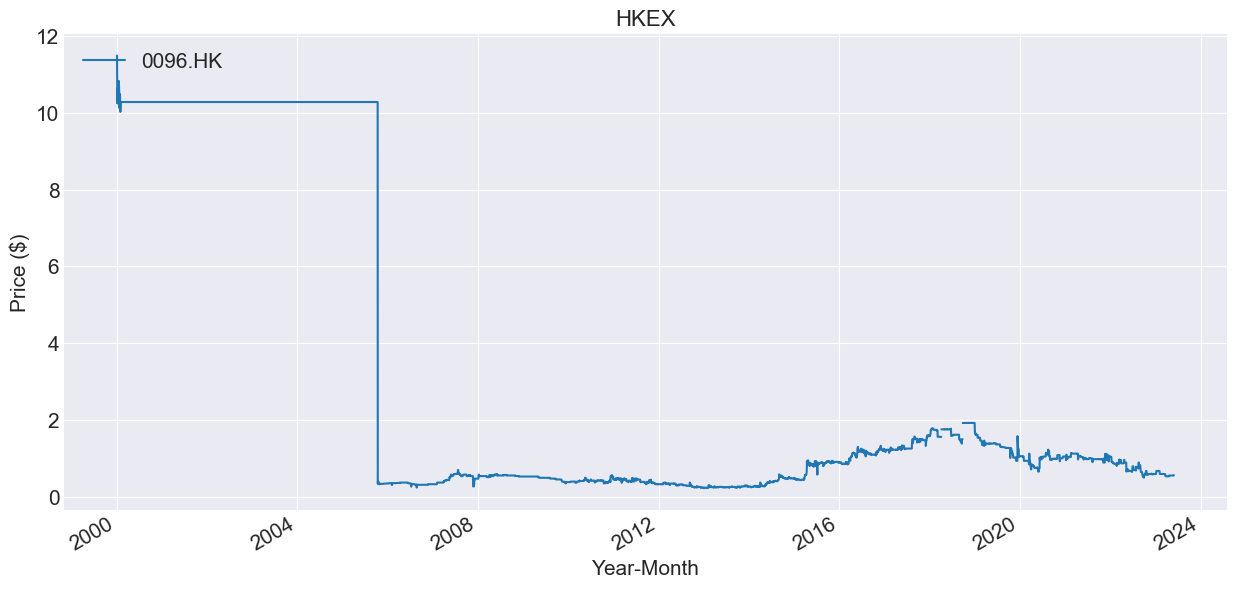

In [69]:
# Set the figure size
ax = plt.figure(figsize=(15, 7))

# Plot both futures close prices
ax = adj_close_data["0096.HK"].plot(label=adj_close_data["0096.HK"].name)

# Set the title and axis labels and sizes
plt.title('HKEX', fontsize=16)
ax.set_xlabel('Year-Month', fontsize=15)
ax.set_ylabel('Price ($)', fontsize=15)
ax.tick_params(axis='both', labelsize=15)
h1, l1 = ax.get_legend_handles_labels()
ax.legend(h1, l1, loc=2, prop={'size': 15})

# Show the plot
plt.show()

<Figure size 35000x7000 with 0 Axes>

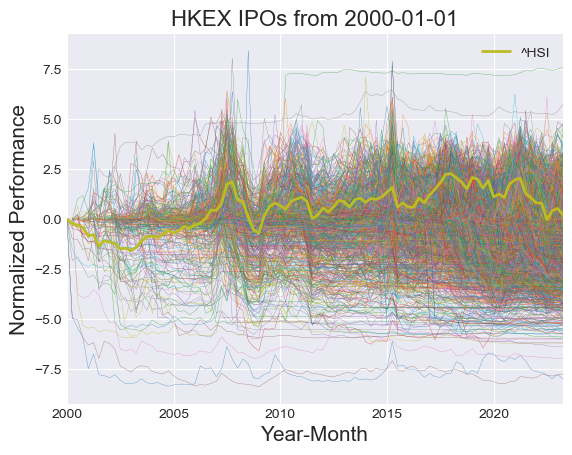

In [162]:
# Set the figure size
ax = plt.figure(figsize=(350, 70))

# Plot both futures close prices
# ax = adj_close_data_filtered.iloc[:, 1:20].plot(legend=False, lw=0.1)
# ax = adj_close_data_filtered_weekly.iloc[:, 1:20].plot(legend=False, lw=0.5)
# ax = adj_close_data_filtered.plot(legend=False, lw=0.1)
# ax = adj_close_data_filtered_monthly.iloc[:, 1:20].plot(legend=False, lw=0.5)
# ax = adj_close_data_filtered_monthly.plot(legend=False, lw=0.5)
# ax = adj_close_data_filtered_qly.plot(legend=False, lw=0.2)
# ax = adj_close_data_filtered_yly.plot(legend=False, lw=0.2)
# ax = adj_close_data_filtered_yly_normal.plot(legend=False, lw=0.2)
ax = adj_close_data_filtered_qly_normal.plot(legend=False, lw=0.2)
ax2 = hsi_data_qly_normal.plot(legend=True, lw=2)

# Set the title and axis labels and sizes
plt.title('HKEX IPOs from 2000-01-01', fontsize=16)
ax.set_xlabel('Year-Month', fontsize=15)
ax.set_ylabel('Normalized Performance', fontsize=15)
# ax2.tick_params(axis='y', labelsize=15)
# h1, l1 = ax.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# ax.legend(h2, l2, loc=2, prop={'size': 15})
# ax.set_ylim(-5,5)

# Show the plot
# plt.show()
plt.savefig('figure.png', dpi=600)